In [39]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from datetime import datetime


In [53]:
dat = pd.read_json("gg{}.json".format(2013))

In [61]:
def getsenti(text):
    return TextBlob(text).sentiment[0]
dat["sentiment"] = dat["text"].apply(getsenti)
def categorize(num):
    if num == 0.00:
        return "neutral"
    elif num <= 1.00 and num > 0.50:
        return "very positive"
    elif num <= 0.50 and num > 0.00:
        return "slightly positive"
    elif num < 0.00 and num > -0.50:
        return "slightly negative"
    else:
        return "very negative"
dat['category'] = dat["sentiment"].apply(categorize)
dat

,text,user,id,timestamp_ms,sentiment,category
0,JLo's dress! #eredcarpet #GoldenGlobes,"{'screen_name': 'Dozaaa_xo', 'id': 557374298}",290620657987887104,0:45:00 - 1:45:00,0.000000,neutral
1,What's making Sofia Vergara's boobs stay like ...,"{'screen_name': 'theAmberShow', 'id': 14648726}",290620657887219713,0:45:00 - 1:45:00,0.500000,slightly positive
2,RT @FabSugar: Kerry Washington is EVERYTHING. ...,"{'screen_name': 'SweetyPW', 'id': 35498686}",290620657828524032,0:45:00 - 1:45:00,0.000000,neutral
3,Anne Hathaway has got me living. #GoldenGlobes,"{'screen_name': '_NicoleEdwards', 'id': 144430...",290620657799159809,0:45:00 - 1:45:00,0.000000,neutral
4,Jennifer Lopez's lace dress? Thoughts? #Golden...,"{'screen_name': 'lolaogunnaike', 'id': 134953223}",290620657778188288,0:45:00 - 1:45:00,0.000000,neutral
...,...,...,...,...,...,...
174638,RT @authorViviAnna: I was sad that Mandy Patin...,"{'screen_name': 'dana1204', 'id': 18091543}",290675889379876864,3:45:00 - 4:45:00,0.333333,slightly positive
174639,RT @_ItzelMartinez_: Jennifer Lawrence aceptan...,"{'screen_name': 'IamTrisEverdeen', 'id': 55126...",290675889128230914,3:45:00 - 4:45:00,0.000000,neutral
174640,"Golden Globes, lots of fashion messes...but gl...","{'screen_name': 'Dpharmakis23', 'id': 852045842}",290675893024747523,3:45:00 - 4:45:00,0.500000,slightly positive
174641,Did they have mug shots at the golden globes?!...,"{'screen_name': 'reynaramirez22', 'id': 22732662}",290675888763314178,3:45:00 - 4:45:00,0.468750,slightly positive


In [57]:
t1 = datetime.strptime("Jan 14 00:45:00 2013", "%b %d %H:%M:%S %Y")
t2 = datetime.strptime("Jan 14 01:45:00 2013", "%b %d %H:%M:%S %Y")
t3 = datetime.strptime("Jan 14 02:45:00 2013", "%b %d %H:%M:%S %Y")
t4 = datetime.strptime("Jan 14 03:45:00 2013", "%b %d %H:%M:%S %Y")
t5 = datetime.strptime("Jan 14 04:45:00 2013", "%b %d %H:%M:%S %Y")

dat['timestamp_ms'][0] > t1

True

In [58]:
t1 = datetime.strptime("Jan 14 00:45:00 2013", "%b %d %H:%M:%S %Y")
t2 = datetime.strptime("Jan 14 01:45:00 2013", "%b %d %H:%M:%S %Y")
t3 = datetime.strptime("Jan 14 02:45:00 2013", "%b %d %H:%M:%S %Y")
t4 = datetime.strptime("Jan 14 03:45:00 2013", "%b %d %H:%M:%S %Y")
t5 = datetime.strptime("Jan 14 04:45:00 2013", "%b %d %H:%M:%S %Y")

def hourconvert(tm):
    if max(tm, t1) == tm and max(tm,t2) == t2:
        result = "0:45:00 - 1:45:00"
        return(result)
    elif max(tm, t2) == tm and max(tm,t3) == t3:
        result = "1:45:00 - 2:45:00"
        return(result)
    elif max(tm, t3) == tm and max(tm,t4) == t4:
        result = "2:45:00 - 3:45:00"
        return(result)
    elif max(tm, t4) == tm and max(tm,t5) == t5:
        result = "3:45:00 - 4:45:00"
        return(result)

dat['timestamp_ms']=dat['timestamp_ms'].apply(hourconvert)

In [72]:
# neutraldf = dat[dat.category == "neutral"].copy()
time1 = dat[dat.timestamp_ms == "0:45:00 - 1:45:00"].copy()
time2 = dat[dat.timestamp_ms == "1:45:00 - 2:45:00"].copy()
time3 = dat[dat.timestamp_ms == "2:45:00 - 3:45:00"].copy()
time4 = dat[dat.timestamp_ms == "3:45:00 - 4:45:00"].copy()

time1_n = len(time1[time1.category == "neutral"])
time1_sp = len(time1[time1.category == "slightly positive"].copy())
time1_vp = len(time1[time1.category == "very positive"].copy())
time1_sn = len(time1[time1.category == "slightly negative"].copy())
time1_vn = len(time1[time1.category == "very negative"].copy())

time2_n = len(time2[time2.category == "neutral"])
time2_sp = len(time2[time2.category == "slightly positive"].copy())
time2_vp = len(time2[time2.category == "very positive"].copy())
time2_sn = len(time2[time2.category == "slightly negative"].copy())
time2_vn = len(time2[time2.category == "very negative"].copy())

time3_n = len(time3[time3.category == "neutral"])
time3_sp = len(time3[time3.category == "slightly positive"].copy())
time3_vp = len(time3[time3.category == "very positive"].copy())
time3_sn = len(time3[time3.category == "slightly negative"].copy())
time3_vn = len(time3[time3.category == "very negative"].copy())

time4_n = len(time4[time4.category == "neutral"])
time4_sp = len(time4[time4.category == "slightly positive"].copy())
time4_vp = len(time4[time4.category == "very positive"].copy())
time4_sn = len(time4[time4.category == "slightly negative"].copy())
time4_vn = len(time4[time4.category == "very negative"].copy())

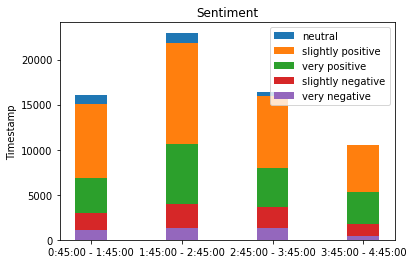

<Figure size 432x288 with 0 Axes>

In [77]:
width = 0.35 

fig, ax = plt.subplots()

timestamps = ["0:45:00 - 1:45:00","1:45:00 - 2:45:00","2:45:00 - 3:45:00","3:45:00 - 4:45:00"]
neutral = [time1_n, time2_n,time3_n,time4_n]
spos = [time1_sp, time2_sp,time3_sp,time4_sp]
vpos = [time1_vp, time2_vp,time3_vp,time4_vp]
sneg = [time1_sn, time2_sn,time3_sn,time4_sn]
vneg = [time1_vn, time2_vn,time3_vn,time4_vn]

ax.bar(timestamps, neutral, width, label='neutral')
ax.bar(timestamps, spos, width, label='slightly positive')
ax.bar(timestamps, vpos, width, label='very positive')
ax.bar(timestamps, sneg, width, label='slightly negative')
ax.bar(timestamps, vneg, width, label='very negative')

ax.set_ylabel('Timestamp')
ax.set_title('Sentiment')
ax.legend()
plt.show()
plt.savefig('sentigraph.png')


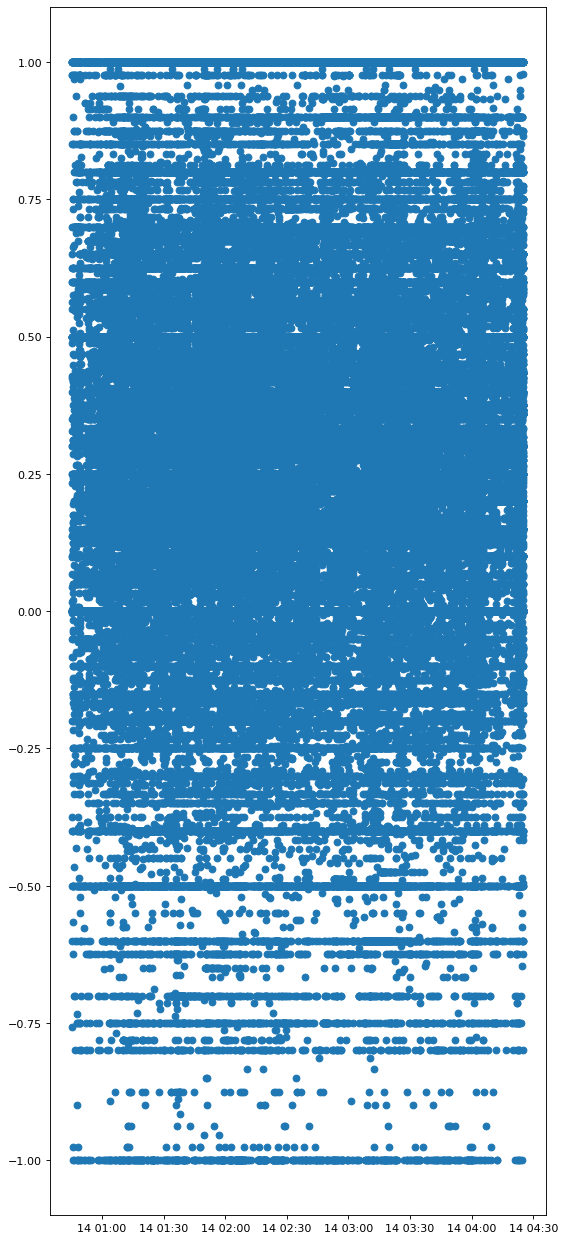

In [17]:
# plott = dat.plot.figure(figsize=(8, 8), dpi=80)
# plott.scatter(x = 'timestamp_ms', y = "sentiment")
# plott.autoscale
plt.figure(figsize=(8, 20), dpi=80)
plt.scatter(x = dat['timestamp_ms'], y = dat["sentiment"])
plt.savefig('sentigraph.png')

This code graphs the polarity of a statement (range: -1,1, where negative values are negative sentiment and positive values are positive sentiment) over time. The graphs shows that time does not particularly affect polarity of sentiment but that overall, positive sentiments in tweets are more common than negative sentiments, and overall it seems the polarity of the tweets skew towards positive rather than negative.